In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('kazemi_eval.csv')

In [ ]:
df

,Unnamed: 0,qid,image_path,question,answer,att_type,prediction,confidence,att_target,mismatch,on_prediction,map,rank_corr,intersect,precision,recall,disc_intersect,IoU,dice,f1
0,0,4983680,model_data/val2014/COCO_val2014_000000498368.jpg,What is the green vegetable?,broccoli,deconv,broccoli,0.999322,broccoli,True,True,[[-1.0497895 -0.97783893 -1.0608681 ... -1.1...,-0.088176,0.000003,0.002280,0.002879,30.0,0.000883,0.001765,0.002544
1,1,4983681,model_data/val2014/COCO_val2014_000000498368.jpg,What type of food is this?,soup,deconv,broccoli,0.648543,soup,False,False,[[-1.0105422 -0.8906566 -1.0310193 ... -1.1...,-0.114124,0.000003,0.009829,0.008614,140.0,0.003004,0.005990,0.009181
2,2,4983681,model_data/val2014/COCO_val2014_000000498368.jpg,What type of food is this?,soup,deconv,broccoli,0.648543,broccoli,False,True,[[-1.1417755 -1.0315642 -1.1602263 ... -1.3138...,-0.118962,0.000003,0.034112,0.044301,720.0,0.013613,0.026860,0.038544
3,3,4983682,model_data/val2014/COCO_val2014_000000498368.jpg,What is cooking in the pot?,vegetables,deconv,broccoli,0.550164,vegetables,False,False,[[-1.0286317 -0.94184476 -1.0429739 ... -1.1...,-0.095496,0.000002,0.005298,0.004362,61.0,0.001547,0.003090,0.004784
4,4,4983682,model_data/val2014/COCO_val2014_000000498368.jpg,What is cooking in the pot?,vegetables,deconv,broccoli,0.550164,broccoli,False,True,[[-1.1303116 -1.0537226 -1.142798 ... -1.2...,-0.117883,0.000003,0.006418,0.007937,111.0,0.002458,0.004904,0.007096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,2770320,model_data/val2014/COCO_val2014_000000277032.jpg,How many people?,1,salien,4,0.259802,1,False,False,[[-0.36989102 -0.47717607 -0.5675069 ... -0.3...,0.322905,0.000009,0.778282,0.449835,13388.0,0.211374,0.348982,0.570138
3906,3906,2770320,model_data/val2014/COCO_val2014_000000277032.jpg,How many people?,1,salien,4,0.259802,4,False,True,[[-0.61136526 -0.6295592 -0.65281487 ... -0.5...,0.318167,0.000009,0.754728,0.465258,13847.0,0.216278,0.355639,0.575651
3907,3907,2770321,model_data/val2014/COCO_val2014_000000277032.jpg,Is it sunny?,yes,salien,no,0.641106,yes,False,False,[[-0.69391835 -0.73373634 -0.5792131 ... -0.6...,0.208925,0.000009,0.407158,0.496757,8885.0,0.182410,0.308539,0.447516
3908,3908,2770321,model_data/val2014/COCO_val2014_000000277032.jpg,Is it sunny?,yes,salien,no,0.641106,no,False,True,[[-0.7016097 -0.6305525 -0.65980834 ... -0.5...,0.218281,0.000009,0.415168,0.515096,9213.0,0.188985,0.317892,0.459764


In [ ]:
masks = {
    'wrong_targetcorr': np.logical_and((df['mismatch']), np.logical_not(df['on_prediction'])),
    'wrong_targetpred': np.logical_and((df['mismatch']), (df['on_prediction'])),
    'correct': np.logical_and(np.logical_not(df['mismatch']), (df['on_prediction'])),
    'conf25': df['confidence'] < 0.25,
    'conf50': np.logical_and(df['confidence'] < 0.50, df['confidence'] > 0.25), 
    'conf75': np.logical_and(df['confidence'] < 0.75, df['confidence'] > 0.50), 
    'conf100': df['confidence'] > 0.75,
}

numeric_mask = ['confidence', 'rank_corr', 'intersect', 'precision', 'recall', 'disc_intersect', 'IoU', 'f1']

In [ ]:
def analyze(dfdf):
    dfdf.hist(bins=20, figsize=(10, 8))
    plt.show()

masklist1 = ['wrong_targetcorr', 'wrong_targetpred', 'correct']
masklist2 = ['conf25', 'conf50', 'conf75', 'conf100']

wrong_targetpred conf25


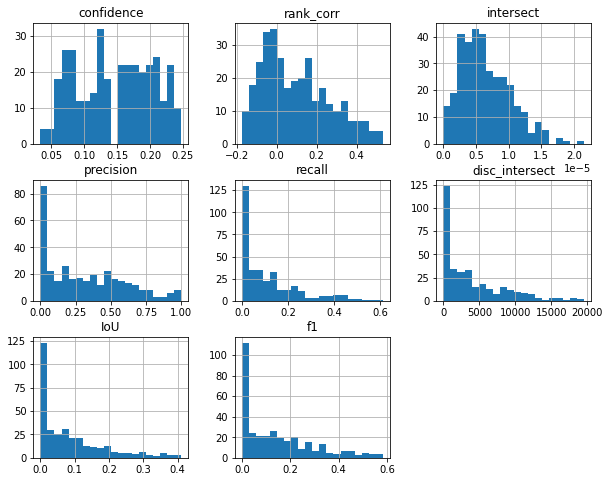

,confidence,rank_corr,intersect,precision,recall,disc_intersect,IoU,f1
count,342.000000,324.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.146181,0.098631,0.000006,0.316760,0.110004,3883.818713,0.087019,0.146529
std,0.057114,0.167127,0.000004,0.277786,0.128884,4416.112486,0.098192,0.151432
min,0.033164,-0.173254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094901,-0.036712,0.000004,0.047794,0.007516,255.250000,0.006213,0.012350
50%,0.156569,0.064466,0.000006,0.271971,0.065170,2522.000000,0.053899,0.102283
75%,0.198624,0.213676,0.000009,0.531604,0.159498,6019.750000,0.127367,0.225954
max,0.247654,0.531029,0.000022,1.000000,0.611137,19597.000000,0.410999,0.582564


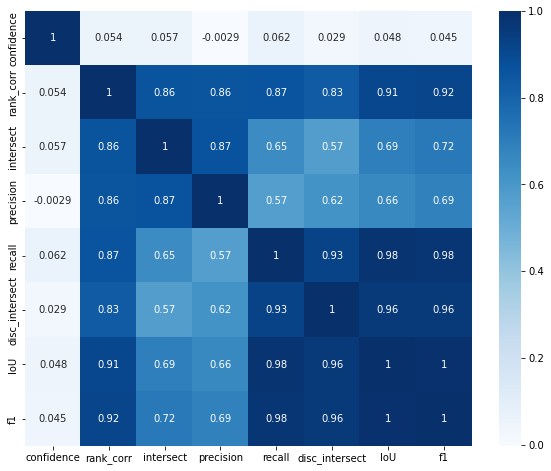

In [ ]:
m1 = masklist1[1]
m2 = masklist2[0]
print(m1, m2)
dfdf = df[np.logical_and(masks[m1], masks[m2])][numeric_mask]
analyze(dfdf)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfdf.corr(), cmap='Blues', annot=True, ax=ax)
dfdf.describe()

correct conf25


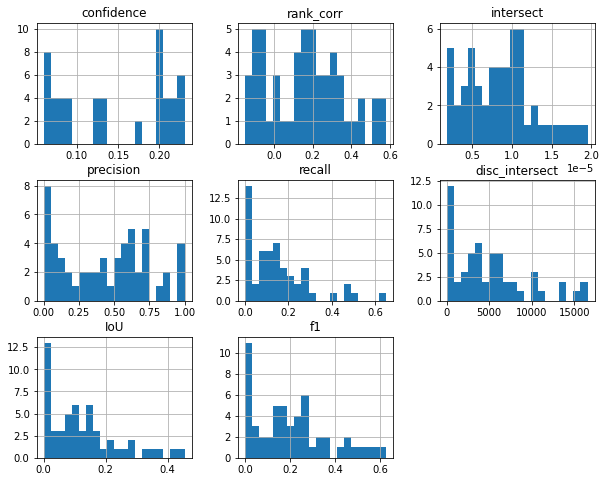

,confidence,rank_corr,intersect,precision,recall,disc_intersect,IoU,f1
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.146719,0.161464,0.000009,0.437269,0.152101,4988.925926,0.124892,0.205682
std,0.064365,0.196423,0.000004,0.309002,0.144269,4408.272600,0.113488,0.166349
min,0.059754,-0.149354,0.000002,0.000248,0.000035,1.000000,0.000031,0.000061
25%,0.085249,-0.025651,0.000005,0.134773,0.031170,1508.250000,0.027949,0.054281
50%,0.132409,0.156078,0.000008,0.448393,0.123501,3669.000000,0.100793,0.183120
75%,0.207657,0.300658,0.000011,0.670223,0.204513,6846.000000,0.162378,0.279386
max,0.230523,0.579838,0.000020,0.998149,0.650275,16562.000000,0.454805,0.625244


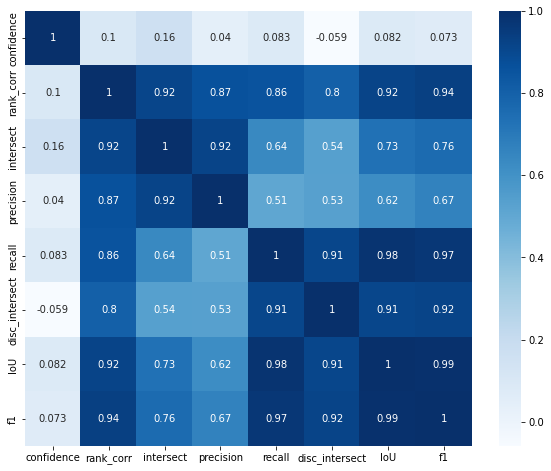

In [ ]:
m1 = masklist1[2]
m2 = masklist2[0]
print(m1, m2)
dfdf = df[np.logical_and(masks[m1], masks[m2])][numeric_mask]
analyze(dfdf)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfdf.corr(), cmap='Blues', annot=True, ax=ax)
dfdf.describe()

wrong_targetpred conf100


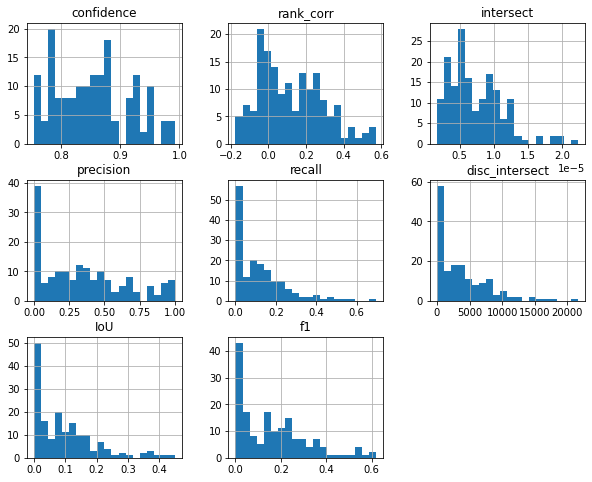

,confidence,rank_corr,intersect,precision,recall,disc_intersect,IoU,f1
count,166.000000,162.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.854052,0.121360,0.000007,0.349148,0.123851,3861.283133,0.096740,0.163001
std,0.063417,0.169937,0.000004,0.294483,0.132230,4087.795655,0.098954,0.150479
min,0.754203,-0.174650,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.798630,-0.017427,0.000005,0.061719,0.018700,634.500000,0.013678,0.026985
50%,0.849869,0.089523,0.000006,0.306876,0.087240,2736.000000,0.077322,0.143545
75%,0.893553,0.243861,0.000010,0.539270,0.178920,6216.250000,0.141041,0.247214
max,0.992289,0.573719,0.000022,0.999445,0.698268,21643.000000,0.450137,0.620820


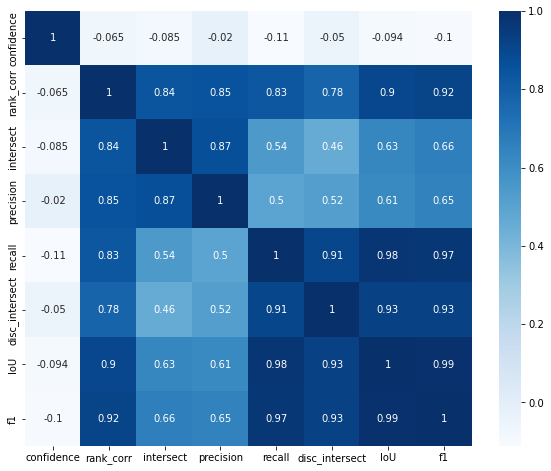

In [ ]:
m1 = masklist1[1]
m2 = masklist2[3]
print(m1, m2)
dfdf = df[np.logical_and(masks[m1], masks[m2])][numeric_mask]
analyze(dfdf)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfdf.corr(), cmap='Blues', annot=True, ax=ax)
dfdf.describe()

correct conf100


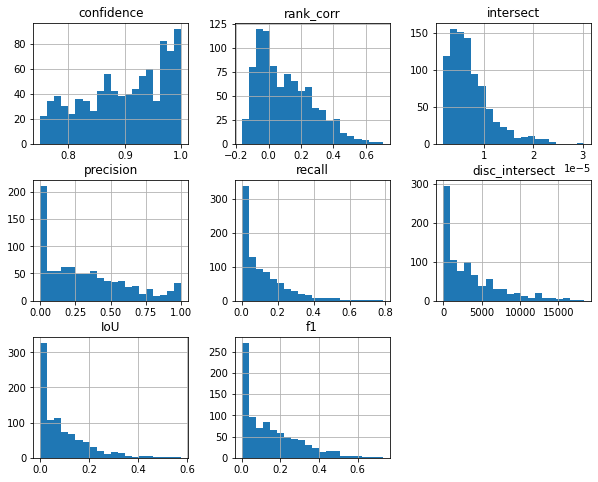

,confidence,rank_corr,intersect,precision,recall,disc_intersect,IoU,f1
count,902.000000,890.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,0.898825,0.101289,0.000007,0.318906,0.117022,3523.687361,0.089841,0.151658
std,0.072435,0.169371,0.000004,0.281913,0.133176,3781.035151,0.097723,0.148504
min,0.750171,-0.165508,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.843844,-0.036850,0.000004,0.059788,0.015356,442.000000,0.011594,0.022922
50%,0.909627,0.064597,0.000006,0.262516,0.074232,2424.000000,0.061202,0.115344
75%,0.965308,0.218981,0.000009,0.503964,0.174123,5425.750000,0.137285,0.241426
max,0.999796,0.703681,0.000030,1.000000,0.784510,18341.000000,0.574799,0.729996


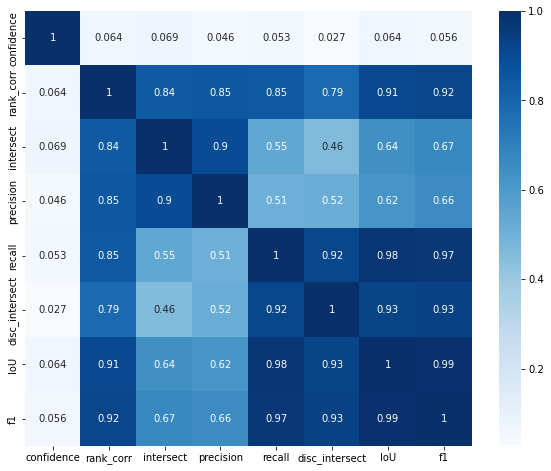

In [ ]:
m1 = masklist1[2]
m2 = masklist2[3]
print(m1, m2)
dfdf = df[np.logical_and(masks[m1], masks[m2])][numeric_mask]
analyze(dfdf)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dfdf.corr(), cmap='Blues', annot=True, ax=ax)
dfdf.describe()

In [ ]:
df_means = pd.DataFrame()
df_median = pd.DataFrame()

df_means = df_means.append(df[np.logical_and(masks['correct'], masks['correct'])][numeric_mask].describe().loc['mean'].rename('correct-mean'))
df_median = df_median.append(df[np.logical_and(masks['correct'], masks['correct'])][numeric_mask].describe().loc['50%'].rename('correct-50%'))

df_means = df_means.append(df[np.logical_and(masks['wrong_targetpred'], masks['wrong_targetpred'])][numeric_mask].describe().loc['mean'].rename('wrong_targetpred-mean'))
df_median = df_median.append(df[np.logical_and(masks['wrong_targetpred'], masks['wrong_targetpred'])][numeric_mask].describe().loc['50%'].rename('wrong_targetpred-50%'))

df_means = df_means.append(df[np.logical_and(masks['correct'], masks['conf25'])][numeric_mask].describe().loc['mean'].rename('correct-conf25-mean'))
df_median = df_median.append(df[np.logical_and(masks['correct'], masks['conf25'])][numeric_mask].describe().loc['50%'].rename('correct-conf25-50%'))

df_means = df_means.append(df[np.logical_and(masks['correct'], masks['conf100'])][numeric_mask].describe().loc['mean'].rename('correct-conf100-mean'))
df_median = df_median.append(df[np.logical_and(masks['correct'], masks['conf100'])][numeric_mask].describe().loc['50%'].rename('correct-conf100-50%'))

df_means = df_means.append(df[np.logical_and(masks['wrong_targetpred'], masks['conf25'])][numeric_mask].describe().loc['mean'].rename('wrong_targetpred-conf25-mean'))
df_median = df_median.append(df[np.logical_and(masks['wrong_targetpred'], masks['conf25'])][numeric_mask].describe().loc['50%'].rename('wrong_targetpred-conf25-50%'))

df_means = df_means.append(df[np.logical_and(masks['wrong_targetpred'], masks['conf100'])][numeric_mask].describe().loc['mean'].rename('wrong_targetpred-conf100-mean'))
df_median = df_median.append(df[np.logical_and(masks['wrong_targetpred'], masks['conf100'])][numeric_mask].describe().loc['50%'].rename('wrong_targetpred-conf100-50%'))

norm = np.array([0.094007, 0.726387, 3737.129321, 0.157612, 0.000007, 0.334461, 0.111003, 0.121376])

df_means = df_means / norm
df_median = df_median / norm

In [ ]:
df_median

,IoU,confidence,disc_intersect,f1,intersect,precision,rank_corr,recall
correct-50%,0.685777,1.074405,0.671639,0.768510,0.908549,0.838639,0.729071,0.629086
wrong_targetpred-50%,0.627897,0.568016,0.652239,0.707263,0.859992,0.804106,0.609368,0.576292
correct-conf25-50%,1.072182,0.182285,0.981770,1.161841,1.209728,1.340643,1.406072,1.017509
correct-conf100-50%,0.651033,1.252262,0.648626,0.731822,0.889424,0.784894,0.581943,0.611587
wrong_targetpred-conf25-50%,0.573352,0.215545,0.674850,0.648956,0.842829,0.813162,0.580760,0.536929
wrong_targetpred-conf100-50%,0.822518,1.169995,0.732113,0.910751,0.887679,0.917523,0.806488,0.718762


[]

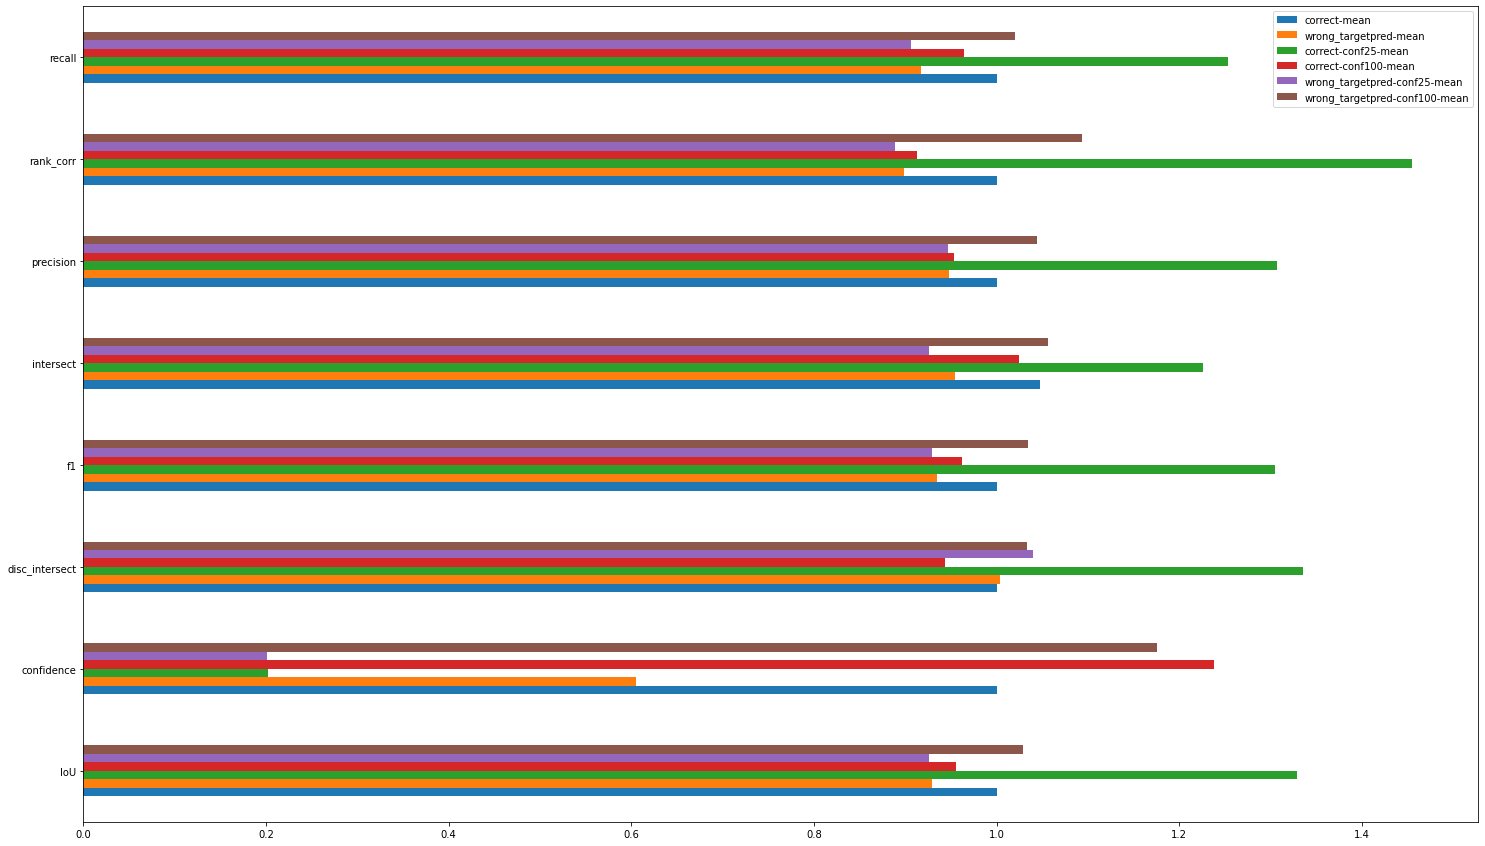

In [ ]:
df_means.transpose().plot.barh(figsize=(25, 15))
plt.legend(loc='best')
plt.plot()

[]

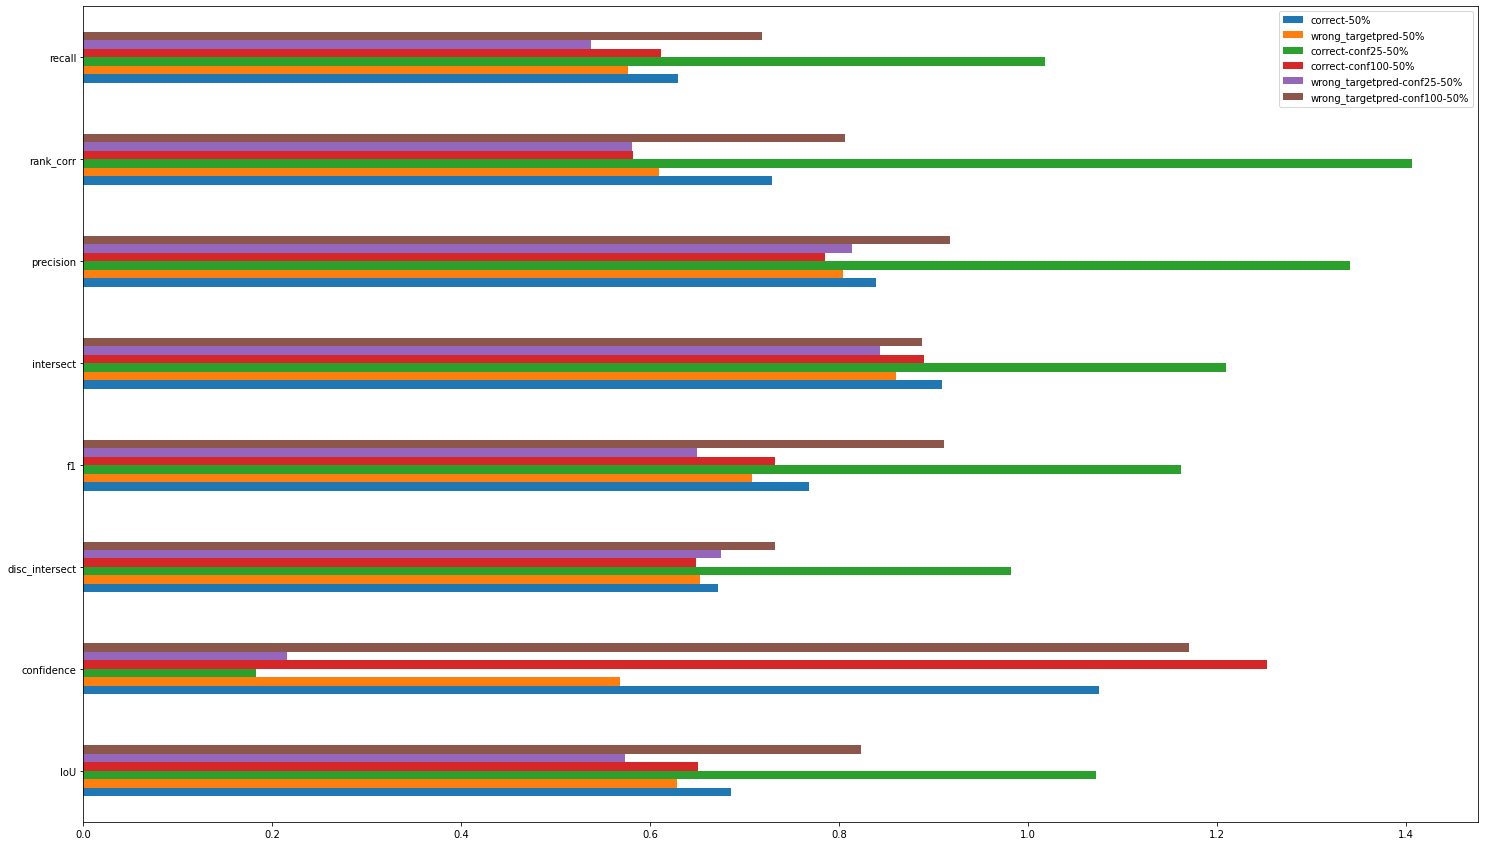

In [ ]:
df_median.transpose().plot.barh(figsize=(25, 15))
plt.legend(loc='best')
plt.plot()

In [ ]:
df_describer = pd.concat([
                          df_correct.describe().loc['mean'],
                          df_correct.describe().loc['50%'],
                          df_wrong.describe().loc['mean'],
                          df_wrong.describe().loc['50%']
                          ], axis=0, join='outer', names=['correct mean', 'correct mean', 'correct mean', 'correct mean'])

df_describer

confidence           0.726387
rank_corr            0.111003
intersect            0.000007
precision            0.334461
recall               0.242752
disc_intersect    3737.129321
IoU                  0.094007
dice                 0.157612
f1                   0.240857
confidence           0.780434
rank_corr            0.080929
intersect            0.000006
precision            0.280492
recall               0.152712
disc_intersect    2510.000000
IoU                  0.064468
dice                 0.121127
f1                   0.200516
confidence           0.439838
rank_corr            0.099771
intersect            0.000007
precision            0.317106
recall               0.222669
disc_intersect    3751.544803
IoU                  0.087399
dice                 0.147228
f1                   0.226177
confidence           0.412600
rank_corr            0.067642
intersect            0.000006
precision            0.268942
recall               0.139896
disc_intersect    2437.500000
IoU       

In [ ]:
df_wrong.describe()

,confidence,rank_corr,intersect,precision,recall,disc_intersect,IoU,dice,f1
count,1116.000000,1072.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.439838,0.099771,0.000007,0.317106,0.222669,3751.544803,0.087399,0.147228,0.226177
std,0.258963,0.166763,0.000004,0.282318,0.259244,4272.682046,0.098556,0.150170,0.217645
min,0.033164,-0.194454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209038,-0.036594,0.000004,0.047841,0.017891,306.750000,0.006777,0.013463,0.022622
50%,0.412600,0.067642,0.000006,0.268942,0.139896,2437.500000,0.059027,0.111473,0.181373
75%,0.654982,0.210253,0.000009,0.514947,0.325599,5778.250000,0.128619,0.227923,0.358287
max,0.992289,0.655101,0.000022,1.000000,1.396537,22070.000000,0.531495,0.694087,0.965012


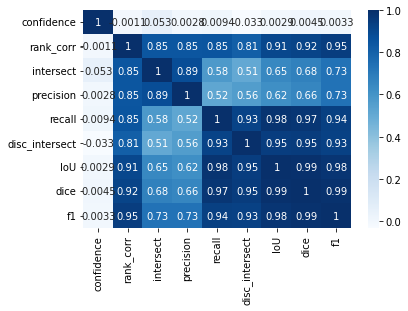

In [ ]:
import seaborn as sns
df_nums = df[numeric_mask].copy()


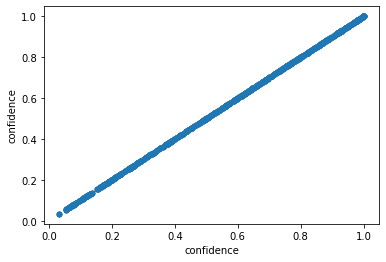

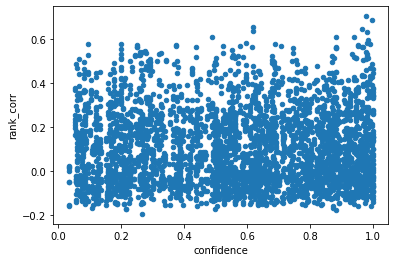

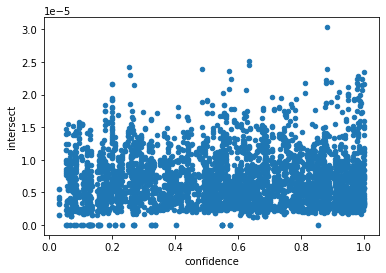

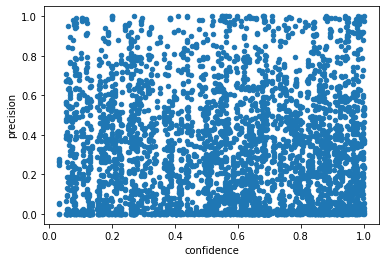

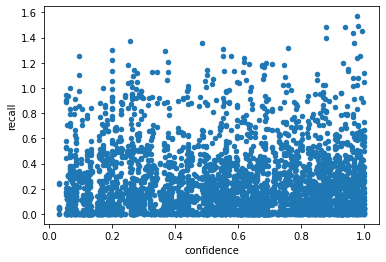

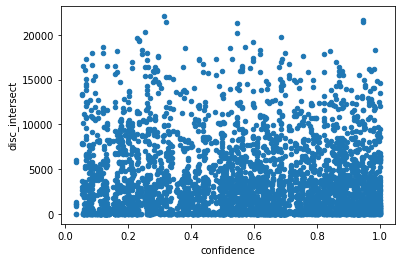

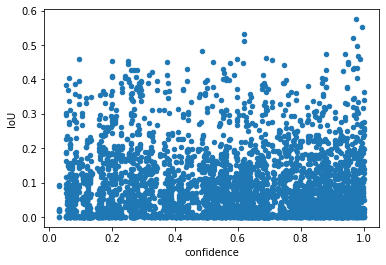

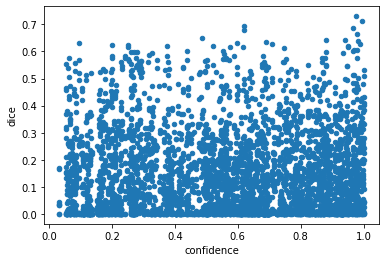

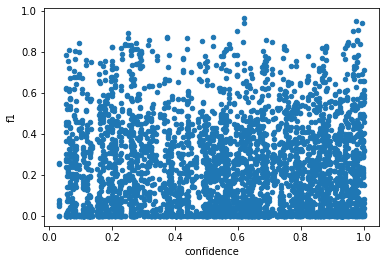

In [ ]:
df_nums = df[numeric_mask].copy()
for y in df_nums.columns:
    mean = df_nums[y].to_numpy().mean()
    std = mean = df_nums[y].to_numpy().std()
    df_nums[y] = (df_nums[y] - mean) / std
for y in df_nums.columns:
    df.plot.scatter(x='confidence', y=y)